In [1]:
import pandas as pd
import numpy as np

In [2]:
body_fat_dataset = pd.read_csv("./datasets/bodyfat.csv")

### Carga de utilidades

In [3]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../')))

In [4]:
from utilities.scripts.metricas import calcular_cantidad_outliers, metricas_iqr, obtener_metricas_columna
from utilities.scripts.graficos import plot_boxplot, plot_correlaciones, plot_histogramas, plot_scatterplot
from utilities.scripts.procesamiento import agregar_bmi, aplicar_transformaciones_inline, categorizar_bmi, codificar_dummy_feature, escalar_features, imputar_ceros_con_metrica, one_hot_encoding_bmi, procesar_dataframe_completo, split_dataframe_train_test

### Prueba de utilidades - métricas

In [5]:
for col in body_fat_dataset.columns[:3]:
    obtener_metricas_columna(data=body_fat_dataset[col])
    asd = body_fat_dataset[col]
    metricas_iqr(data=body_fat_dataset[col])
    calcular_cantidad_outliers(data=body_fat_dataset[col])

### Prueba de utilidades - gráficos

In [6]:
body_fat_dataset.columns[:4]

Index(['Density', 'BodyFat', 'Age', 'Weight'], dtype='object')

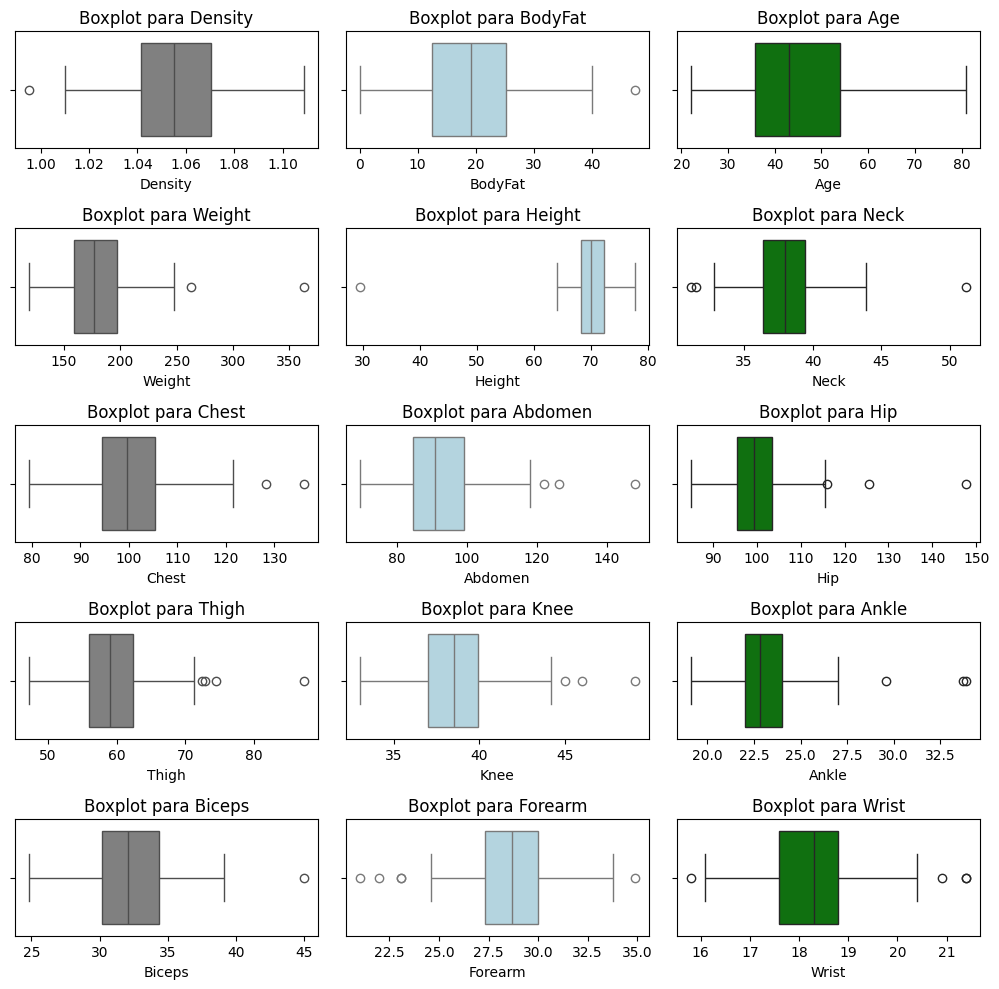

In [7]:
plot_boxplot(body_fat_dataset, body_fat_dataset.columns, figsize=(10,10))

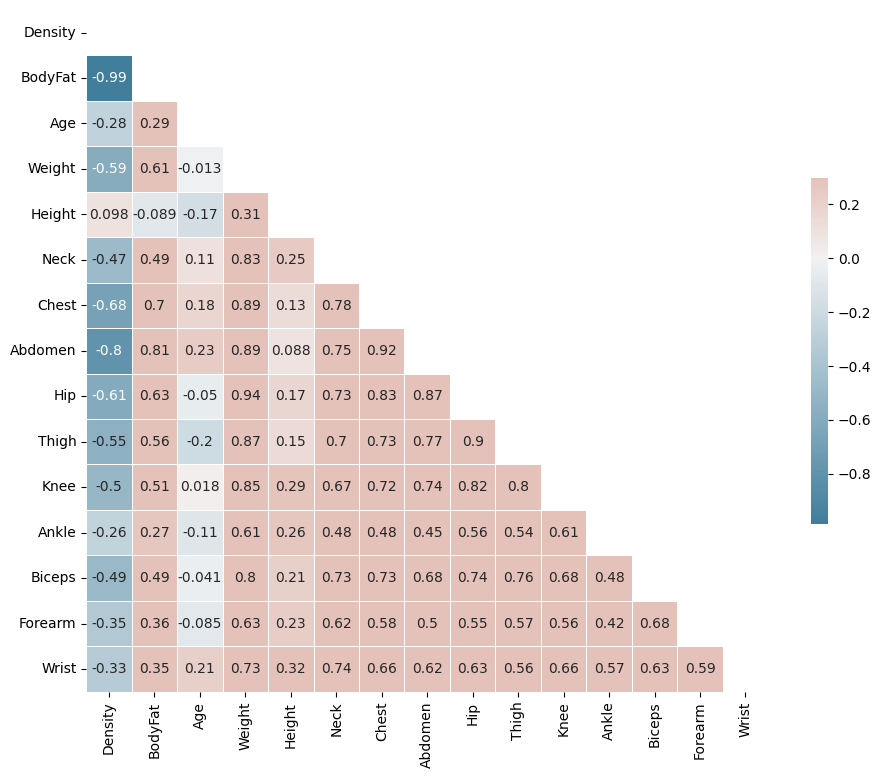

In [8]:
plot_correlaciones(body_fat_dataset)

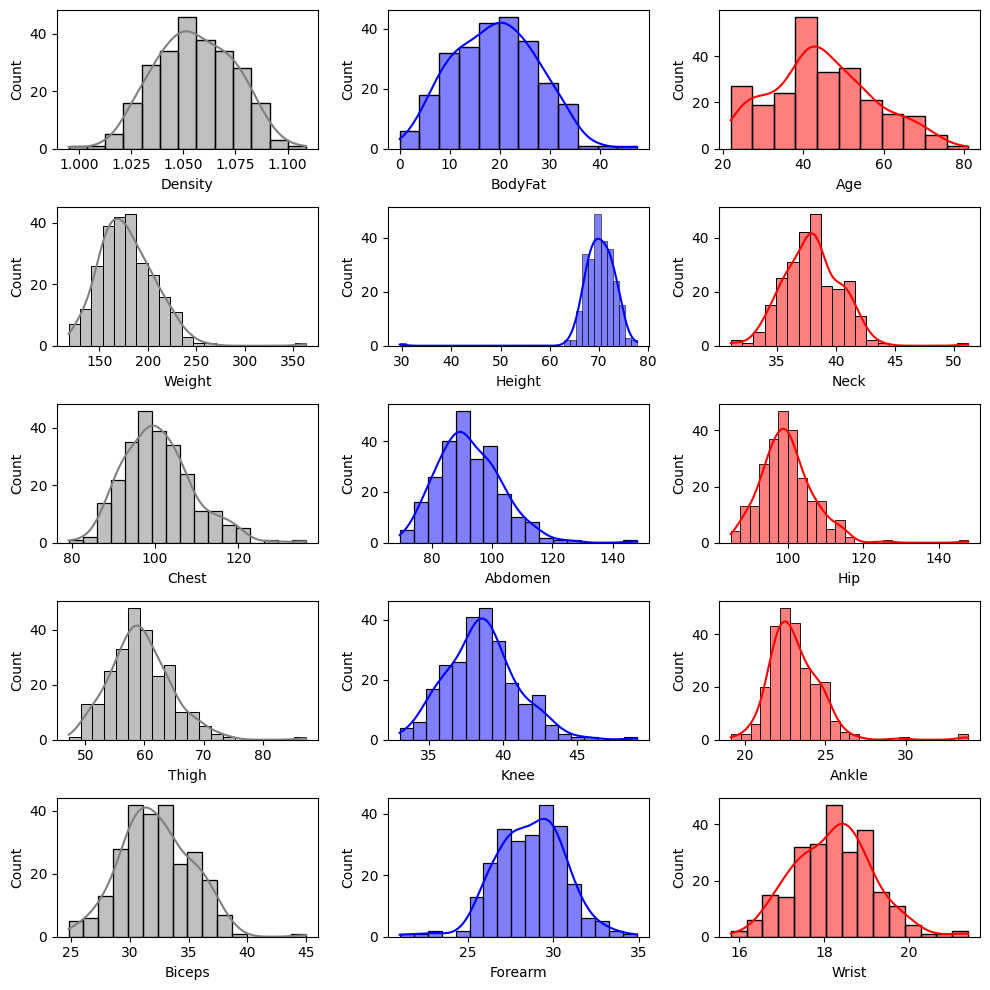

In [9]:
plot_histogramas(body_fat_dataset, body_fat_dataset.columns, figsize=(10,10))

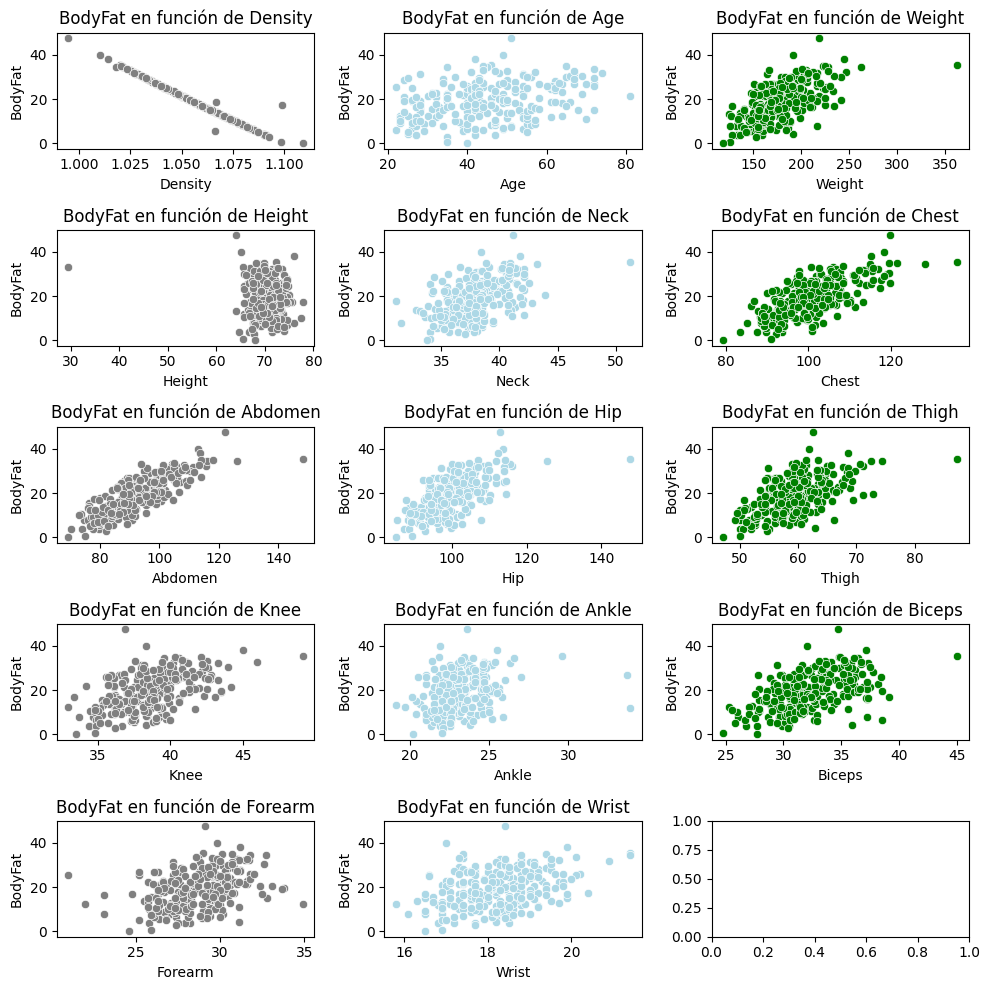

In [10]:
plot_scatterplot(data=body_fat_dataset, columns=body_fat_dataset.columns, ycol="BodyFat", figsize=(10,10))

### Prueba de utilidades - procesamiento

In [11]:
target = "BodyFat"
test_size = 0.3
random_state = 323123

In [12]:
X_train, X_test, y_train, y_test = split_dataframe_train_test(dataframe=body_fat_dataset, random_state=random_state, target=target, test_size=test_size)

In [13]:
y_train = imputar_ceros_con_metrica(data=y_train)

In [14]:
# NOTA: Se crea un dataset temporal con las variables Weight y Height, ya que serán utilizadas en el proceso de creación de nuevas features, y sus valores originales son necesarios
X_train_temp = X_train[["Weight", "Height"]]
X_test_temp = X_test[["Weight", "Height"]]

In [15]:
X_train.describe()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,1.056697,44.562500,176.809943,70.480114,37.836364,100.111932,91.507955,99.211364,58.914205,38.412500,23.014205,32.157955,28.689773,18.160227
std,0.018351,12.588274,26.177078,2.591117,2.177846,7.787075,9.593268,6.036933,4.749746,2.291765,1.753844,2.790790,1.917441,0.885314
min,1.014000,23.000000,118.500000,64.000000,32.800000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,25.300000,22.000000,15.800000
25%,1.042400,35.000000,159.000000,68.437500,36.275000,93.900000,84.250000,95.150000,56.000000,36.700000,22.000000,30.100000,27.375000,17.575000
50%,1.056400,43.000000,175.750000,70.250000,37.800000,99.600000,90.750000,99.250000,58.500000,38.400000,22.750000,32.050000,28.600000,18.200000
75%,1.070825,52.250000,194.250000,72.250000,39.400000,104.625000,98.300000,102.525000,61.750000,39.700000,23.825000,34.000000,30.000000,18.800000
max,1.108900,81.000000,247.250000,77.750000,43.900000,121.600000,115.900000,116.100000,74.400000,45.000000,33.900000,38.500000,34.900000,20.900000


In [16]:
aplicar_transformaciones_inline(dataframe=X_train)

In [17]:
X_train.describe()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,0.052403,8.533433,7.088997,0.679203,4.843037,1.700612,3.637641,4.548893,1.850257,2.549263,0.307771,15.282957,11.509003,2.626194
std,0.015872,1.234723,0.270455,0.000071,0.099822,0.006467,0.066866,0.059575,0.012498,0.027732,0.000002,1.035458,0.550363,0.039870
min,0.013748,6.107246,6.391299,0.679006,4.600388,1.680234,3.462216,4.399169,1.814630,2.478424,0.307762,12.667472,9.502585,2.512733
25%,0.040163,7.639560,6.913500,0.679148,4.772604,1.695546,3.588411,4.509743,1.842986,2.528926,0.307770,14.525563,11.135245,2.600384
50%,0.052504,8.486744,7.095544,0.679199,4.843792,1.700567,3.636142,4.551083,1.849882,2.550105,0.307771,15.255708,11.490035,2.629016
75%,0.064780,9.353072,7.279583,0.679253,4.915908,1.704639,3.687074,4.582890,1.858232,2.565550,0.307773,15.973263,11.888655,2.655528
max,0.095193,11.558727,7.732162,0.679382,5.106182,1.716431,3.790785,4.704675,1.885483,2.622725,0.307780,17.585919,13.232417,2.741670


In [18]:
agregar_bmi(dataframe=X_train)
agregar_bmi(dataframe=X_test)

In [19]:
X_train["BMI"]

155    10740.904588
30     10907.642883
112    10852.609402
111    10929.934565
106    11176.583392
           ...     
169    10765.750896
53     10422.830753
153    10499.075857
78     10574.317343
156    11257.300657
Name: BMI, Length: 176, dtype: float64

In [20]:
categorizar_bmi(dataframe=X_train)
categorizar_bmi(dataframe=X_test)

In [21]:
X_train, X_test, bmi_cols = one_hot_encoding_bmi(X_train, X_test)

In [22]:
X_train, X_test = codificar_dummy_feature(X_train, X_test, categoryCols=bmi_cols)

In [23]:
# X_train, X_test = 
escalar_features(X_train, X_test)

c:\fiuba\operaciones-aprendizaje-maquina\utilities\scripts\procesamiento.py:203: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[31.24287758 14.9987051  39.36496381 23.12079134 43.42600693 34.49171207
 32.86729482 36.92833794 27.18183446 26.36962583 36.92833794 14.18649648
 14.9987051  51.54809317 45.8626328  36.11612932 36.92833794 45.05042418
 45.8626328  32.0550862  28.8062517  30.43066895 12.56207923 43.42600693
 16.62312235 14.9987051  32.86729482 10.93766198 21.49637409 36.92833794
 51.54809317 22.30858271 27.99404308 19.87195684 24.74520859 21.49637409
 10.93766198 19.05974822 27.18183446 34.49171207 26.36962583 32.86729482
 25.55741721 37.74054657 25.55741721 25.55741721 33.67950345 24.74520859
 36.92833794 27.18183446 18.2475396  27.99404308 34.49171207 25.55741721
 25.55741721 25.55741721 42.61379831 38.55275519 21.49637409 47.48705005
 32.86729482 29.61846033 37.74054657 34.49171207 49.92367592 27.9940430

### Prueba de utilidades - procesamiento completo mediante una sola función

In [24]:
body_fat_dataset_2 = pd.read_csv("./datasets/bodyfat.csv")

In [25]:
target = "BodyFat"
test_size = 0.3
random_state = 323123

In [26]:
X_train_completo, X_test_completo, y_train_completo, y_test_completo = procesar_dataframe_completo(dataframe=body_fat_dataset_2, random_state=random_state, target=target, test_size=test_size)